In [1]:
# load package
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from IPython import display
%matplotlib inline

### CRISP-DM Process : Cross Industry Process for Data Mining
In this note book we will follow this process to learn something from Airbnb dataset


## 1. Business Understanding
- Can we find out top10 listings?
- What's the user keywords for top 10 listings?
- How about the fluctuation of price in 2016?

## 2. Data Understanding
We have three file list below. Let's go over then and try to find the relevant features to our question above.

In [2]:
# load data
filenames =glob.glob('*.csv')
print(filenames)

['calendar.csv', 'listings.csv', 'reviews.csv']


In [3]:
# read csv file 
files = [pd.read_csv(fname, low_memory=False) for fname in filenames]
# roughly review 
for i in files:
    display.display_html(i.head())    
    print(i.shape)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


(1393570, 4)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


(3818, 92)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


(84849, 6)


In [4]:
calendar, listings, reviews = files

### Data understanding Summary
1.	listings file include all listings information in seattle. We have more than 90 featuers to describe a listing. ----There are some relevant columns in this file for first question.
   
2.	A calendar file includes listings price and avaible stauts from 1/4/2016 to 1/2/2017. ----This file has column price and date relevant with question 3.

3.	A reviews file which includes the listings’ occupancy history and comments got from booker from 6/7/2009 to 1/3/2016. ----Comments columns for question 2


### Prepare Data

First let's take a look at the listings. And see how many listings we have.

In [5]:
if listings.id.nunique() == listings.shape[0]:
    print('There are {} rooms provided by Airbnb Seattle'.format(listings.shape[0]))
else:
    print('There are duplicates of ID in this table')

There are 3818 rooms provided by Airbnb Seattle


Let's check if the other two tables have same number of id.

In [6]:
number = 3818
for i in [0,2]:
    print('The number of rooms is {} in file {}'.format(files[i].listing_id.nunique(),filenames[i]))
    d = number - files[i].listing_id.nunique() 
    if d != 0:
        print('The difference is {} '.format(d))


The number of rooms is 3818 in file calendar.csv
The number of rooms is 3191 in file reviews.csv
The difference is 627 


There are 627 listing id not exist in reviews file. Just keep in mind.

##### Check missing data

In [7]:
# How many columns have missing data in listing file.
missing_col_name = listings.columns[listings.isnull().mean()> 0].tolist()
print('{} columns have missing data in listing table, proportion:{}'.format(len(missing_col_name),\
                                                                            len(missing_col_name)/listings.shape[1]))


45 columns have missing data in listing table, proportion:0.4891304347826087


In [8]:
# How many rows associate with review have missing . If it equal to 627?
# find the col have relevant with review
review_col = [i for i in listings.columns if 'review' in i ]

for i in review_col:
    if i in missing_col_name:
        print('Missing rows in {} : {}'.format(i,listings[i].isnull().value_counts()[1]))
    else:
        print('No missing row :{}'.format(i))

No missing row :number_of_reviews
Missing rows in first_review : 627
Missing rows in last_review : 627
Missing rows in review_scores_rating : 647
Missing rows in review_scores_accuracy : 658
Missing rows in review_scores_cleanliness : 653
Missing rows in review_scores_checkin : 658
Missing rows in review_scores_communication : 651
Missing rows in review_scores_location : 655
Missing rows in review_scores_value : 656
Missing rows in reviews_per_month : 627


##### Reason of missing data :627 listings miss review relevenat data due to those id didn't exist in reviews file.

In [9]:
# collect listing id which has no reviews
noreview_id = listings.loc[listings.number_of_reviews ==0,'id'].tolist()

In [10]:
# check the date range in reviews file.
print('reviews file date range: {} to {}'.format(reviews.date.min(),reviews.date.max()))
print('calendar file date range: {} to {}'.format(calendar.date.min(),calendar.date.max()))

reviews file date range: 2009-06-07 to 2016-01-03
calendar file date range: 2016-01-04 to 2017-01-02


#### Summary: These two files have different time period. 627 listing join airbnb or have activity after 2016-1-3. So we may consider those listing were new source. We can remove these rows as they are not useful for answering our questions. 

In [11]:
# Remove the rows associated with nan values in review columns
listings = listings.dropna(subset=['first_review'],axis=0)

In [12]:
listings.shape

(3191, 92)

In [13]:
# collect candidates for top 10
cols=['id']
cols.extend(review_col)
candidate = listings.loc[~listings.id.isin(noreview_id),cols]

In [14]:
candidate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3191 entries, 0 to 3814
Data columns (total 12 columns):
id                             3191 non-null int64
number_of_reviews              3191 non-null int64
first_review                   3191 non-null object
last_review                    3191 non-null object
review_scores_rating           3171 non-null float64
review_scores_accuracy         3160 non-null float64
review_scores_cleanliness      3165 non-null float64
review_scores_checkin          3160 non-null float64
review_scores_communication    3167 non-null float64
review_scores_location         3163 non-null float64
review_scores_value            3162 non-null float64
reviews_per_month              3191 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 324.1+ KB


In [15]:
# check numerical columns
candidate.select_dtypes(exclude='object').describe()

,id,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3.191000e+03,3191.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3191.000000
mean,5.024827e+06,26.590097,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
std,2.802502e+06,39.840788,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,1.822348
min,4.291000e+03,1.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,2.712948e+06,4.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.695000
50%,5.308339e+06,13.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000
75%,7.467034e+06,31.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000
max,1.024814e+07,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000


We are going to use review_scores_rating to sellect top 10. But there are some missing rows.

In [16]:
candidate.review_scores_rating.isnull().value_counts()

False    3171
True       20
Name: review_scores_rating, dtype: int64

20 listing has no rating score. Let's try to find the reason

In [17]:
# get the id of 20 missing rows
missing_rating_id = candidate[candidate['review_scores_rating'].isnull()==True].id.tolist()

In [18]:
reviews[reviews.listing_id.isin(missing_rating_id)]

,listing_id,id,date,reviewer_id,reviewer_name,comments
7581,692080,25895964,2015-01-28,12059638,Skylar,The reservation was canceled 170 days before a...
10501,8338155,55044907,2015-11-27,16305509,Courtney,The host canceled this reservation the day bef...
14066,7614244,58458460,2016-01-02,4772223,Belle,The host canceled this reservation 13 days bef...
15175,9012948,52668525,2015-10-31,47464538,Nathan,The host canceled this reservation 28 days bef...
16754,9028447,56360049,2015-12-12,12904363,Jenny,The host canceled this reservation 10 days bef...
21108,8207848,47237888,2015-09-16,39257911,Julie,The host canceled this reservation 68 days bef...
24470,8080939,47024783,2015-09-14,34936450,Mateusz,The host canceled this reservation 11 days bef...
40488,7536074,39721859,2015-07-25,38094557,Billy & Lindsey,The host canceled this reservation 5 days befo...
54597,5336585,27568467,2015-03-07,23595720,Matt,The reservation was canceled the day before ar...
55636,186328,8620481,2013-11-08,9011692,Darius,The reservation was canceled 43 days before ar...


#### As we see, those listing only have one review and be canceld. So there was only review  record. Those 20 listing can be remove as they will not be top10.

In [19]:
listings = listings.dropna(subset=['review_scores_rating'],axis=0)

## Answer of question 1
- Can we find out top10 listings?

In [20]:
top10_rating = listings.loc[:,['id','review_scores_rating','reviews_per_month']].\
sort_values(by=['review_scores_rating','reviews_per_month',],ascending=False)[:10]

In [21]:
top10_rating

,id,review_scores_rating,reviews_per_month
2107,5056580,100.0,10.95
2791,9436832,100.0,7.32
3581,1974131,100.0,7.15
2783,9494415,100.0,7.00
814,4757025,100.0,6.92
3715,4871348,100.0,6.20
2601,9580021,100.0,6.15
1865,9328278,100.0,6.00
3482,9508837,100.0,5.62
1003,6475289,100.0,5.34


In [22]:
top10_reviews = listings.loc[:,['id','review_scores_rating','reviews_per_month']].\
sort_values(by=['reviews_per_month','review_scores_rating'],ascending=False)[:10]

In [23]:
top10_reviews

,id,review_scores_rating,reviews_per_month
178,6886633,95.0,12.15
1085,8015531,95.0,11.01
2107,5056580,100.0,10.95
3058,3861673,99.0,10.61
2215,6577295,95.0,10.27
1441,365550,94.0,10.12
1458,8372038,97.0,10.00
2138,5705161,96.0,9.72
2445,7483750,94.0,9.70
2145,7362757,97.0,9.63


####  After inspecting our data, we decided to chose 2 groups. One was the rating and the other was occupancy per month. Because they were not overlap mostly. That gave us some insight we may have different types of user.

#### It’s hard to tell the difference just from the two tables. Let try to find more useful information.

In [24]:
# store top 10 listing id
# topS = topScore topR = topReviews
topS_id = top10_rating.id.tolist()
topR_id = top10_reviews.id.tolist()

The price columns is object type which is not convenient for calculate and plot. Let's write a funcion to change the type.

In [25]:
# Funciont for change price type
def str2float(x):
    '''This function is for remove the '$' in price columns and change it to float type.
    
    input x : a price in dataframe
    return the price in float type
    '''
    
    x = x.replace('$','')
    x = x.replace(',','')
    x = float(x)
    
    return x



In [26]:
# test if function work well
listings.price = listings.price.apply(lambda x:str2float(x))
listings.price.describe()

count    3171.000000
mean      126.802586
std        90.007172
min        22.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

### Visulization

In [27]:
# collect some basic features which customer may concern to compare.
top_status = ['id','price','zipcode','space','description',\
              'transit','room_type','bed_type','neighbourhood_cleansed']

top10_S = listings[top_status][listings.id.isin(topS_id)]
top10_S['Top'] = 'Rating'

top10_R = listings[top_status][listings.id.isin(topR_id)]
top10_R['Top'] = 'occupancy'

top10_status = pd.concat([top10_R,top10_S])

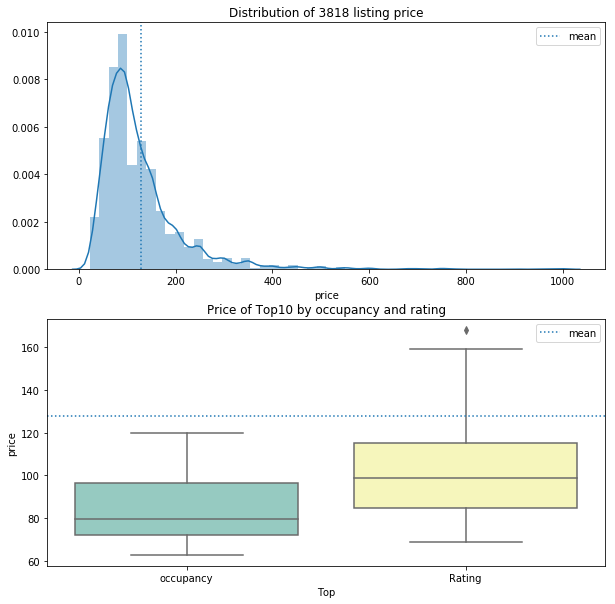

In [29]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10,10))
plt.subplot(211)
sns.distplot(listings.price);
p1 = plt.axvline(x=127.9,ls=":");
plt.legend(handles=[p1],labels=['mean'],loc='best');
plt.title("Distribution of 3818 listing price")
plt.subplot(212)
sns.boxplot(x = 'Top',y='price',data=top10_status,palette="Set3");
p1 = plt.axhline(y=127.9,ls=":");
p2 = plt.title("Price of Top10 by occupancy and rating");
#plt.xticks(rotation=90);
plt.legend(handles=[p1],labels=['mean'],loc='best');

The price of top 10 occupancy lisitings were below the avarage and lower than top 10 rating group generally. Most users prefer to chose cheaper one while some were not much concern about price.

#### Categorical features

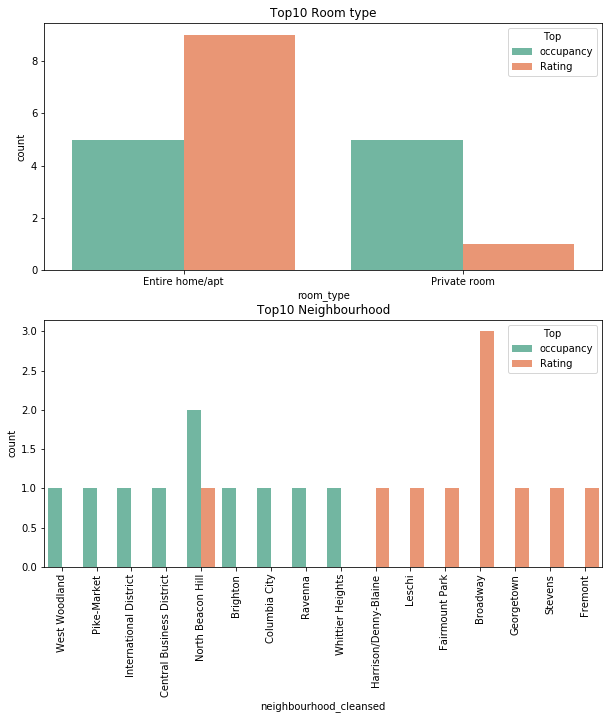

In [30]:

f = plt.figure(figsize=(10,10))
plt.subplot(211)
#plt.xticks(rotation=90)
plt.title('Top10 Room type');
sns.countplot(x='room_type',data=top10_status,hue='Top',palette="Set2");

plt.subplot(212)
plt.xticks(rotation=90)
plt.title('Top10 Neighbourhood');
sns.countplot(x='neighbourhood_cleansed',data=top10_status,hue='Top',palette="Set2");


#### There are two types of room in the two groups. Most listings in rating group were entier home type. But for occupancy group, it's half half. The second plot didn't show any correlation between neighbourhood and group type.

## Answer to question 2
- What's the user keywords for top 10 listings?

In [31]:
# let's see the review status of two top 10 groups.
# get comments for top 10
topS_review = reviews[reviews.listing_id.isin(topS_id)].sort_values(by=['date','listing_id'])
topR_review = reviews[reviews.listing_id.isin(topR_id)].sort_values(by=['date','listing_id'])

In [32]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
import re
import string

Processing data

In [33]:
def clean_comment(df):
    '''Extract tokens from column 'comments' in dataframe and store in a list.
       Remove stopwords and punctuation. 
       Return clean token list.
    '''
    
    stopword = stopwords.words('english')
    punctuation = string.punctuation+"``'s\\"
    word = word_tokenize(str(df.comments.tolist()).lower())    
    clean_p = [i for i in word if i not in punctuation]    
    print('Remove puncuations {}'.format(len(word)-len(clean_p)))
    clean_s = [i for i in clean_p if i not in stopword]
    print('Remove stopwords {}'.format(len(clean_p)-len(clean_s)))
    
    
    return clean_s
    

In [34]:
# get clean tokens for two top 10 groups.
clean_S = clean_comment(topS_review)
clean_R = clean_comment(topR_review)

Remove puncuations 6781
Remove stopwords 19692
Remove puncuations 12780
Remove stopwords 35299


In [35]:
def freq_word(clean):
    """Calculate word frequency and return top 50 words."""
    
    freq_dist = FreqDist(clean)
    cand_dist = {i[0]:freq_dist[i[0]] for i in nltk.pos_tag(freq_dist.keys()) if i[1] in ['JJ']}
    words_plot = sorted(cand_dist.items(),key=lambda x:x[1],reverse=True)[:50]
    
    return dict(words_plot)

In [36]:
# calculate words frequency for two groups
word_plot_R = freq_word(clean_R)
word_plot_S = freq_word(clean_S)

Visulization:plot wordcloud for each group.

In [37]:
from pyecharts import WordCloud
wordcloud = WordCloud(width=900, height=620)
wordcloud.add("", attr=[k for k in word_plot_R.keys()], \
              value=[v for v in word_plot_R.values()], \
              word_size_range=[20, 100])
#wordcloud.render()

In [38]:
wordcloud = WordCloud(width=900, height=620)
wordcloud.add("WordCloud Top10 Rating", attr=[k for k in word_plot_S.keys()], \
              value=[v for v in word_plot_S.values()], \
              word_size_range=[20, 100])

### Prepare data for question 3

In [39]:
# check if each id have same number of rows.
calendar.listing_id.value_counts().describe()

count    3818.0
mean      365.0
std         0.0
min       365.0
25%       365.0
50%       365.0
75%       365.0
max       365.0
Name: listing_id, dtype: float64

####  imputing missing date
Some rows missing price due to the listing is not available. We will imputing 0 for those rows.

In [40]:
# change price type and fill missing value
calendar.price.fillna('$0.00',inplace=True)
calendar.price = calendar.price.apply(lambda x:str2float(x))

##### Extract features from column 'date for plot modeling later

In [41]:
# add season features
calendar.date = pd.to_datetime(calendar.date)
calendar['year'] = calendar.date.apply(lambda x:x.year)
calendar['month'] = calendar.date.apply(lambda x:x.month)
calendar['week'] = calendar.date.apply(lambda x:x.weekofyear)
calendar['dayofyear'] = calendar.date.apply(lambda x:x.dayofyear)
calendar['dayofweek'] = calendar.date.apply(lambda x:x.weekday())
calendar['isweekend'] = calendar.dayofweek.isin([5,6]).map({True:1,False:0})

#### Visulization

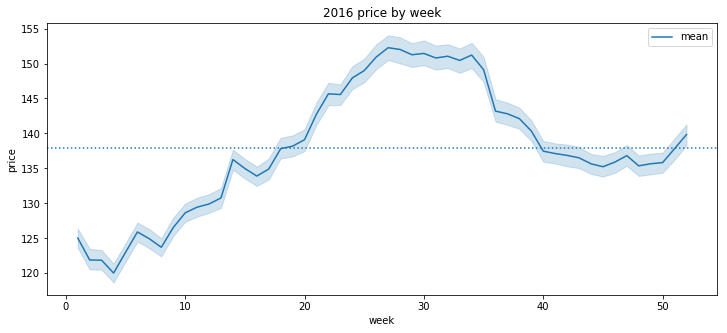

In [42]:
f = plt.figure(figsize=(12,5))
sns.lineplot(x='week',y='price',data=calendar[(calendar.price != 0)]);
plt.axhline(y=137.95,ls=":");
plt.title('2016 price by week')
plt.legend(labels=['mean'],loc='best');

### Answer to question 3:
- Above plot shows a trend for price in 2016. The lowset price appeared at the begining of year. Maybe beacuase the Chrismas day. The price started to rise since Feb and reached the peak in the middle of year and last for roughly two months. Then back to the average level.
- Further more, we plot the price curve for top10 groups below. Here we find some interesting trend. For some listings the price will rose on Fri and Sat and fall back on other days. Also, we find some hosts were lazy to change the price. They just used one price for whole year.

In [43]:
ctopS = calendar[calendar.listing_id.isin(topS_id)]
ctopR = calendar[calendar.listing_id.isin(topR_id)]

In [44]:
temp = pd.concat([ctopS,ctopR])
temp.loc[:,'listing_id'] = temp.loc[:,'listing_id'].astype('category')
temp.drop_duplicates(inplace=True)
temp.sort_values(by='date',inplace=True)


Plot price fluctation for top 10

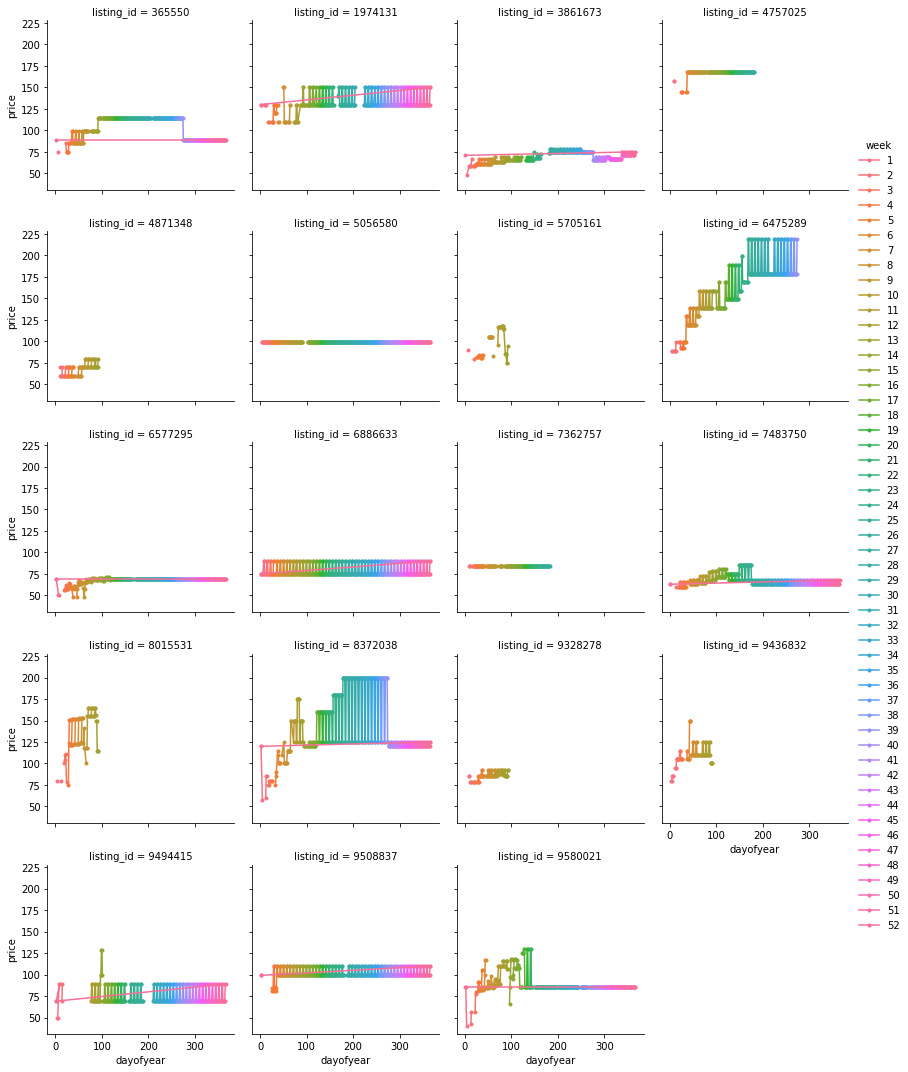

In [45]:
g =sns.FacetGrid(data=temp[temp.available =='t'],col='listing_id',col_wrap=4,\
                 hue='week',hue_order=temp.week.unique().tolist())
g = g.map(plt.plot,'dayofyear','price',marker='.').add_legend()

In [334]:
# check if all listings are available in some date
calendar['listing_id'][calendar.available == 't'].value_counts().describe()

count    3723.000000
mean      251.018533
std       122.119707
min         1.000000
25%       139.000000
50%       313.000000
75%       360.000000
max       365.000000
Name: listing_id, dtype: float64

Only 3723 listings available.

Onehot categorical columns

In [46]:
calendar = pd.get_dummies(calendar)

In [49]:
# Add a columns to indicate cumusum of available day
calendar['sum_avai'] = calendar.groupby(['listing_id'])['available_t'].cumsum()

In [50]:
calendar.head()

,listing_id,date,price,year,month,week,dayofyear,dayofweek,isweekend,available_f,available_t,sum_avai
0,241032,2016-01-04,85.0,2016,1,1,4,0,0,0,1,1
1,241032,2016-01-05,85.0,2016,1,1,5,1,0,0,1,2
2,241032,2016-01-06,0.0,2016,1,1,6,2,0,1,0,2
3,241032,2016-01-07,0.0,2016,1,1,7,3,0,1,0,2
4,241032,2016-01-08,0.0,2016,1,1,8,4,0,1,0,2


In [51]:
# split data into feature and target
feature = calendar.drop(['price'],axis=1)
target = calendar.price

# drop date feature
feature.drop('date',axis=1,inplace=True)

# year is a very big number compaired with other, let's change it's type and encoder it.
#feature.year =feature.year.astype('category')
#feature.year.cat.rename_categories({2016:1,2017:2},inplace=True)

In [52]:
feature.head()

,listing_id,year,month,week,dayofyear,dayofweek,isweekend,available_f,available_t,sum_avai
0,241032,2016,1,1,4,0,0,0,1,1
1,241032,2016,1,1,5,1,0,0,1,2
2,241032,2016,1,1,6,2,0,1,0,2
3,241032,2016,1,1,7,3,0,1,0,2
4,241032,2016,1,1,8,4,0,1,0,2


In [53]:
# onehot categorical features
cat = ['month','week','dayofweek','isweekend','year']

for col in cat:
    feature.loc[:,col] = feature.loc[:,col].astype('category')

feature = pd.get_dummies(feature)

In [54]:
feature.head()

,listing_id,dayofyear,available_f,available_t,sum_avai,year_2016,year_2017,month_1,month_2,month_3,...,week_52,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,isweekend_0,isweekend_1
0,241032,4,0,1,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,241032,5,0,1,2,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,241032,6,1,0,2,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,241032,7,1,0,2,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,241032,8,1,0,2,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


## Data Modeling 

In [55]:
# split train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,shuffle=False)

In [56]:
import lightgbm as lgb

In [57]:
model = lgb.LGBMRegressor().fit(x_train,y_train)

In [58]:
y_pred = model.predict(x_test)

### Evaluate the Results

In [59]:
from sklearn.metrics import mean_absolute_error,r2_score

print('mae',mean_absolute_error(y_test,y_pred))
print('r2',r2_score(y_test,y_pred))

mae 53.55660180189326
r2 0.3006010581514993


Not a good model so far, we can do more EDA and feature engineer in future.